<a href="https://colab.research.google.com/github/colliercoder/Twitter/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Completed a walkthrough of this guy's tutorial: https://www.youtube.com/watch?v=ujId4ipkBio

In [ ]:
#Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TWITTER_KEYS.csv to TWITTER_KEYS.csv


In [ ]:
#Get the data
keys = pd.read_csv('TWITTER_KEYS.csv',sep = ',')


In [ ]:
consumer_key = keys['CONSUMERKEY'][0]
consumer_secret = keys['CONSUMERSECRET'][0]
access_token = keys['ACCESSTOKEN'][0]
access_token_secret = keys['ACCESSTOKENSECRET'][0]

In [ ]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)



In [ ]:
#Set the access toekn and access token secret
authenticate.set_access_token(access_token,access_token_secret)

In [ ]:
#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "joebiden",count = 1000, lang = "en", tweet_mode = "extended")

#Print the last 5 tweets from the account
print("Show the 5 most recent tweets: \n")

for i, tweet in enumerate(posts[0:5]):
  print(str(i+1) + ') ' + tweet.full_text + '\n')

Show the 5 most recent tweets: 

1) Right now, the average billionaire—there are about 790 of them or so in America—has an average federal tax rate of 8%. 

No billionaire should be paying a lower tax rate than a teacher, a firefighter, an electrician, or a police officer.

2) Rebuilding America with union labor is smart for business.  

Why? When union workers are on the job, projects are completed efficiently and professionally, and they ultimately save money.

3) Unions allow workers to maintain their dignity. 

It's a lot more than just paychecks and benefits, it's about the dignity of workers.

4) We're working to make sure safe baby formula gets to all who need it by:

- Invoking the Defense Production Act to increase domestic production 
- Launching Operation Fly Formula to use federal planes to fly formula in from abroad

5) We cannot remain silent.
https://t.co/NsZFMjgbam



In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,"Right now, the average billionaire—there are a..."
1,Rebuilding America with union labor is smart f...
2,Unions allow workers to maintain their dignity...
3,We're working to make sure safe baby formula g...
4,We cannot remain silent.\nhttps://t.co/NsZFMjgbam


In [ ]:
#Clean the text, Create a function to clean the tweets

def clean(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #r says to python that it is a raw string
  text = re.sub(r'#','',text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing Retweets
  text = re.sub(r'https?:\/\/\S+', '', text) #Removing hyperlinks

  return text

In [ ]:
df['Tweets'] = df['Tweets'].apply(clean)
df.head(10)

,Tweets
0,"Right now, the average billionaire—there are a..."
1,Rebuilding America with union labor is smart f...
2,Unions allow workers to maintain their dignity...
3,We're working to make sure safe baby formula g...
4,We cannot remain silent.\n
5,"In America, evil will not win, I promise you. ..."
6,"Three years ago, I kicked off my campaign for ..."
7,"We’ve reduced the deficit by $350 billion, and..."
8,Electing to the United States Senate would be...
9,A plan by Republican Senator Rick Scott would ...


In [ ]:
# Create a function to get the subjectivity (how subjective or opinionated the text is)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,"Right now, the average billionaire—there are a...",0.445238,-0.004762
1,Rebuilding America with union labor is smart f...,0.580952,0.104762
2,Unions allow workers to maintain their dignity...,0.500000,0.500000
3,We're working to make sure safe baby formula g...,0.657778,0.520000
4,We cannot remain silent.\n,0.100000,0.000000
...,...,...,...
195,My plan to fight inflation will lower your eve...,0.600000,-0.200000
196,Too many families are still struggling with hi...,0.522619,0.455952
197,"Since I took office, the economy has created 7...",0.500000,0.270833
198,: Our economy has now added 7.4 million jobs s...,0.177778,-0.077778


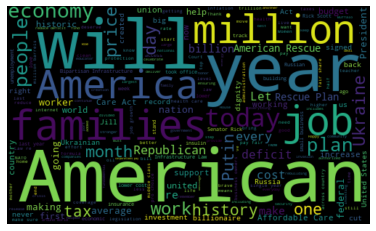

In [ ]:
# Plot Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 1, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show;

In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Right now, the average billionaire—there are a...",0.445238,-0.004762,Negative
1,Rebuilding America with union labor is smart f...,0.580952,0.104762,Positive
2,Unions allow workers to maintain their dignity...,0.500000,0.500000,Positive
3,We're working to make sure safe baby formula g...,0.657778,0.520000,Positive
4,We cannot remain silent.\n,0.100000,0.000000,Neutral
...,...,...,...,...
195,My plan to fight inflation will lower your eve...,0.600000,-0.200000,Negative
196,Too many families are still struggling with hi...,0.522619,0.455952,Positive
197,"Since I took office, the economy has created 7...",0.500000,0.270833,Positive
198,: Our economy has now added 7.4 million jobs s...,0.177778,-0.077778,Negative


In [ ]:

# Print all of the positive tweets
sortedDF = df.sort_values(by = 'Polarity')
for i,j in enumerate((range(0,sortedDF.shape[0]))): # number of rows shape[0]
  if (sortedDF['Analysis'][j] == 'Positive'):
    print(str(i+1) + ')' + sortedDF['Tweets'][j])
    

2)Rebuilding America with union labor is smart for business.  

Why? When union workers are on the job, projects are completed efficiently and professionally, and they ultimately save money.
3)Unions allow workers to maintain their dignity. 

It's a lot more than just paychecks and benefits, it's about the dignity of workers.
4)We're working to make sure safe baby formula gets to all who need it by:

- Invoking the Defense Production Act to increase domestic production 
- Launching Operation Fly Formula to use federal planes to fly formula in from abroad
7)Three years ago, I kicked off my campaign for president in Philadelphia. Since then, we've gotten to work making historic infrastructure investments, creating record job growth, and rebuilding our economy.

There's more work ahead of us, but we’re building a better America. 
8)We’ve reduced the deficit by $350 billion, and we’re on track to reduce the deficit by $1.5 trillion this fiscal year.

There’s more work to do, but this has n

In [ ]:
sortedDF

,Tweets,Subjectivity,Polarity,Analysis
52,Just as Putin chose to launch this brutal inva...,1.000000,-0.875,Negative
24,": In remembrance of today’s tragic milestone, ...",0.750000,-0.750,Negative
137,: Putin has the gall to say he is “de-Nazifyin...,1.000000,-0.600,Negative
15,: Jill and I will travel to Buffalo on Tuesday...,0.500000,-0.500,Negative
5,"In America, evil will not win, I promise you. ...",0.473333,-0.440,Negative
...,...,...,...,...
46,"As the proud husband of an educator, I've seen...",1.000000,0.800,Positive
87,: Happy Passover to all who celebrate in Ameri...,1.000000,0.800,Positive
181,We're going to continue to support the brave U...,1.000000,0.800,Positive
152,: Jill and I want to extend our best wishes to...,0.300000,1.000,Positive


In [ ]:
#print negative tweets
sortedDFneg = df.sort_values(by = 'Polarity')
for i,j in enumerate((range(0,sortedDF.shape[0]))): # number of rows shape[0]
  if (sortedDFneg['Analysis'][j] == 'Negative'):
    print(str(i+1) + ')' + sortedDF['Tweets'][j])

1)Right now, the average billionaire—there are about 790 of them or so in America—has an average federal tax rate of 8%. 

No billionaire should be paying a lower tax rate than a teacher, a firefighter, an electrician, or a police officer.
6)In America, evil will not win, I promise you. Hate will not prevail. And white supremacy will not have the last word.
10)A plan by Republican Senator Rick Scott would increase taxes on 70% of the American public and put Social Security, Medicare, and Medicaid on the chopping block every five years.

Under my plan, no one making less than $400,000 will see their taxes increase.
16): Jill and I will travel to Buffalo on Tuesday to grieve with the community that lost ten lives in a senseless and horrific mass s…
24)Senator Rick Scott’s ultra-MAGA agenda could raise taxes on 75 million American families, over 95% of whom make less than $100,000 a year. 

Their plan is going to make working families poorer.

25): In remembrance of today’s tragic milesto

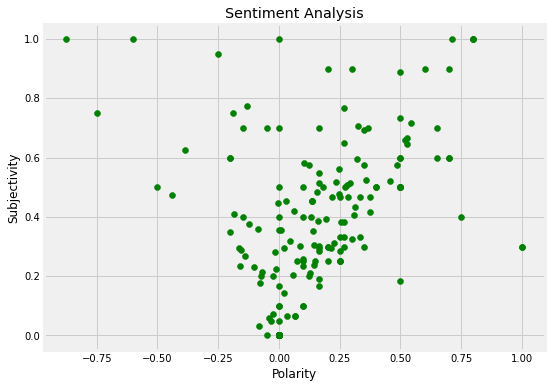

In [ ]:
plt.figure(figsize = (8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets['Tweets']

round(ptweets.shape[0]/df.shape[0]*100,1)

57.5

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets['Tweets']

round(ntweets.shape[0]/df.shape[0]*100,1)

17.5

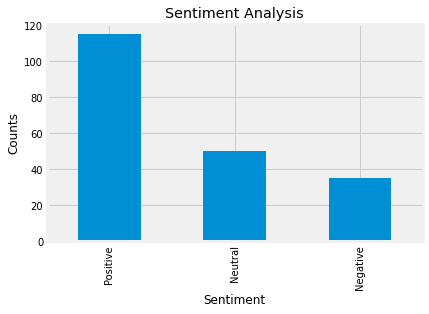

In [ ]:
#Show the value counts 
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar');